# Phase 3 Project: Syriatel Customer Churn
## by Jimmy Mumo

# Introduction

### Overview

The telecommunications industry is an ever-evolving landscape and retaining customers is of utmost importance for sustainable business success. 
Customer churn is a phenomenon where the subscribers discontinue services for whatever reason. This poses a challenge for telecom companies as it directly affects revenue streams as well as market competitiveness as customers may opt to seek the services of rival telecom companies.

The project structure is as follows:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Exploratory Data Analysis
5. Data Modelling
6. Evaluation
7. Recommendations and Conclusions

# 1. Business Understanding

Every business faces the challenge of keeping a loyal and consistent consumer base. For this case SyriaTel, being a telecommunications company, faces the challenge of customer churn at a higher rate because the telecommunications market is highly competetive and ever-changing. Customer churn actively hurts the business growth and even leads to huge losses if not addressed

In order to address this issue adequately, the business can turn to utilise machine learning in order to better understand what causes customer churn and how to combat it. 

By looking at the customer tastes and trends present within the consumer base data, SyriaTel can gain specific information about their consumers and how best to serve them. This prevents customer churn and allows SyriaTel to maximise profits. 

By using Machine learning, SyriaTel can develop a model that predicts customer churn. This model caters for the loss of revenue that customer churn creates as well as helps bolster the existing relationship that the company has with its customers thus helping the company grow its market.

# 2. Data Understanding 
The data used for this project is sourced from Kaggle. This section dives into understanding the structure of the data and its idiosyncracies. 

In [2]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
from sklearn.metrics import  confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE




In [3]:
# Loading the data as a pandas dataframe
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [4]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# Size of the dataset
df.size

69993

In [43]:
# Shape of the dataset/ Number of records
df.shape

(3333, 23)

In [7]:
# Displaying the first few rows of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
# Previewing the bottom rows
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


From the above, the SyriaTel Customer Churn dataset consists of 3333 rows of data records and 21 columns of features, with the final feature (churn) being the target variable. 



The Columns are broken down to these categories:
1. Account Length: This refers to the number of months customers had an account with the company.
2. Area code: this is the customers area code.
3. Phone Number: the customer's phone number.
4. International plan: this indicates whether the customer is subscribed to an international calls plan. It is a binary feature (yes/no).
5. Voice mail plan: indicates whether a customer has a voicemail plan. Also a binary feature
6. Number vmail messages: this is a numerical variable showing the total number of voicemails the customer received.
7. Total day minutes: The total number of calls made by the customer during the day
8. Total Day Calls: The total number of calls made by the customer during the day.
9. Total Day Charge: The total cost incurred by the customer for calls made during the day.
10. Total Eve Minutes: The total duration (in minutes) of calls made by the customer during the evening.
11. Total Eve Calls: The total number of calls made by the customer during the evening.
12. Total Night Minutes: The total duration (in minutes) of calls made by the customer during the night.
13. Total Night Calls: The total number of calls made by the customer during the night.
14. Total Night Charge: The total cost incurred by the customer for calls made during the night.
15. Total Intl Minutes: The total duration (in minutes) of international calls made by the customer.
16. Total Intl Calls: The total number of international calls made by the customer.
17. Total Intl Charge: The total cost incurred by the customer for international calls.
18. Customer Service Calls: The number of calls made by the customer to customer service.
19. Churn: Indicates if the customer has terminated their contract with the company. (Yes/No).



The following section will look into finding anomalies present within the dataset.

# Data Preparation

This section aims to deal with improving the quality of the dataset before any manipulations can take place.

In [9]:
# Looking for duplicates and missing values 

duplicate_values = df.duplicated().sum()

missing_values = df.isna().sum()

print (f'Duplicated values:', duplicate_values)
print(f'missing values:', missing_values)

Duplicated values: 0
missing values: state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


The above analysis shows that there are no missing/null values and duplicate values.

In [50]:
# Removing whitespaces in the column name 
df.columns = df.columns.str.replace(' ', '_')

The above step makes the column names easier to manipulate and process

In [11]:
# checking the whitespace changes
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [51]:
# Viewing the statistical details of the Dataframe
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_charge,customer_service_calls,churn,area_code_408,area_code_415,area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.413491,0.158804,0.512472,0.608701,0.512446,0.552599,0.588908,0.552687,0.477870,0.472590,...,0.511960,0.173651,0.144914,0.251425,0.496550,0.252025,0.903090,0.096910,0.723372,0.276628
std,0.164554,0.268399,0.155266,0.121631,0.155255,0.139439,0.117192,0.139459,0.136024,0.137807,...,0.139588,0.146166,0.352067,0.433897,0.500063,0.434241,0.295879,0.295879,0.447398,0.447398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.301653,0.000000,0.409635,0.527273,0.409624,0.458070,0.511765,0.458104,0.386767,0.380282,...,0.425926,0.111111,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.413223,0.000000,0.511403,0.612121,0.511402,0.553753,0.588235,0.553866,0.478752,0.471831,...,0.514815,0.111111,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.520661,0.392157,0.616876,0.690909,0.616868,0.646962,0.670588,0.647040,0.570468,0.563380,...,0.605556,0.222222,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# Checking for place holders
columns = df
unique_values = {}
for col in columns:
    unique_values[col] = df[col].unique()
unique_values

{'account_length': array([0.52479339, 0.43801653, 0.56198347, 0.34297521, 0.30578512,
        0.48347107, 0.49586777, 0.60330579, 0.47933884, 0.5785124 ,
        0.26446281, 0.30165289, 0.69008264, 0.38842975, 0.25206612,
        0.66115702, 0.34710744, 0.38016529, 0.30991736, 0.29752066,
        0.31404959, 0.53305785, 0.45454545, 0.54132231, 0.71487603,
        0.23140496, 0.21900826, 0.0785124 , 0.19834711, 0.58264463,
        0.70661157, 0.04545455, 0.29338843, 0.1446281 , 0.31818182,
        0.55785124, 0.61157025, 0.40082645, 0.55371901, 0.13636364,
        0.65702479, 0.26033058, 0.23966942, 0.48760331, 0.39669421,
        0.2107438 , 0.24380165, 0.03719008, 0.39256198, 0.3553719 ,
        0.33057851, 0.2768595 , 0.51239669, 0.47520661, 0.15289256,
        0.16115702, 0.17355372, 0.46280992, 0.51652893, 0.61570248,
        0.5661157 , 0.66528926, 0.3677686 , 0.20247934, 0.33471074,
        0.59090909, 0.18595041, 0.28512397, 0.2231405 , 0.4338843 ,
        0.38429752, 0.63636364

# 4. Exploratory Data Analysis

In this section, the data is analysed using univariate, bivariate and multivariate techniques.

This stage allows for ease of feature engineering and model building as the feature vector as well as target variable relationships are explored.

### 4.1 Univariate EDA

This analysis looks into analyzing individual variables. Starting the target variable Churn, it is analyzed to understand its distribution. It holds boolean values: True or False, showing whether a customer will churn or not.

In [52]:
# Visually Representing churn
churn_counts = df['churn'].value_counts()

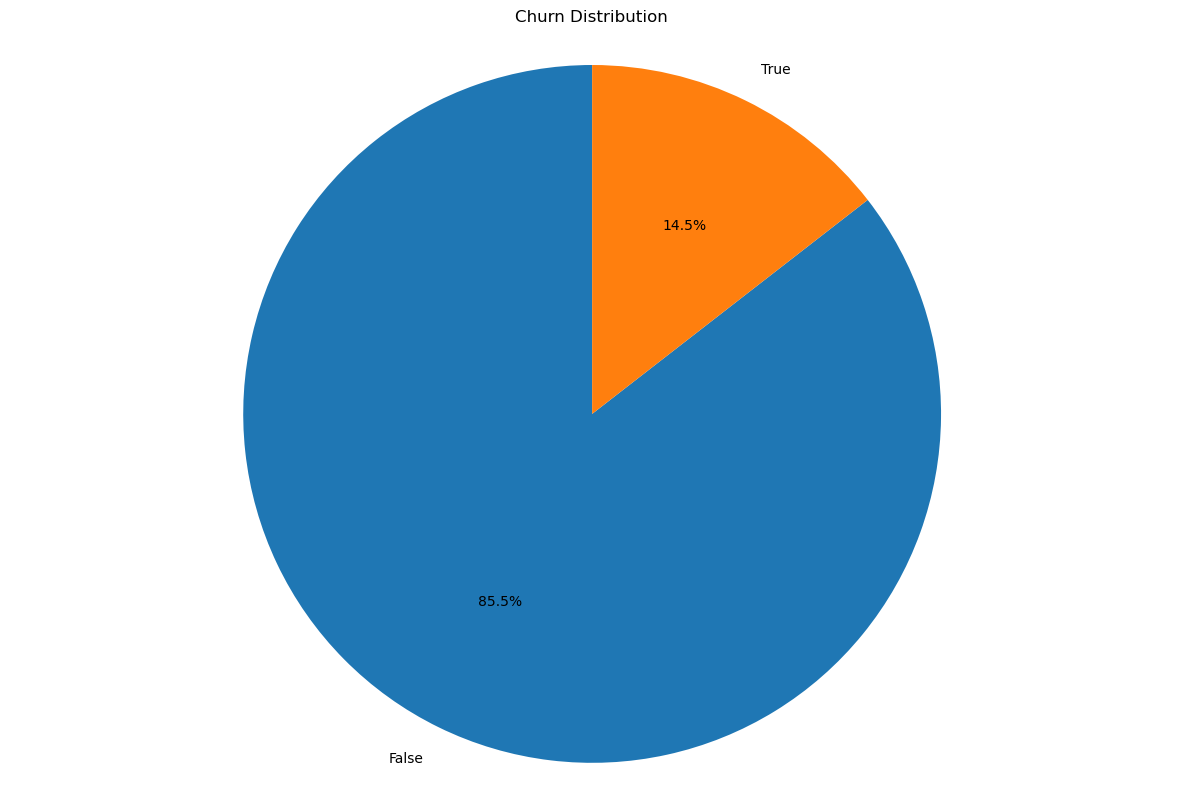

In [26]:
# representing the same using a Pie Chart to visualize the percentages
churn_counts = df['churn'].value_counts()

# Create a new figure with a larger size
plt.figure(figsize=(15, 10))

# Create a pie chart
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

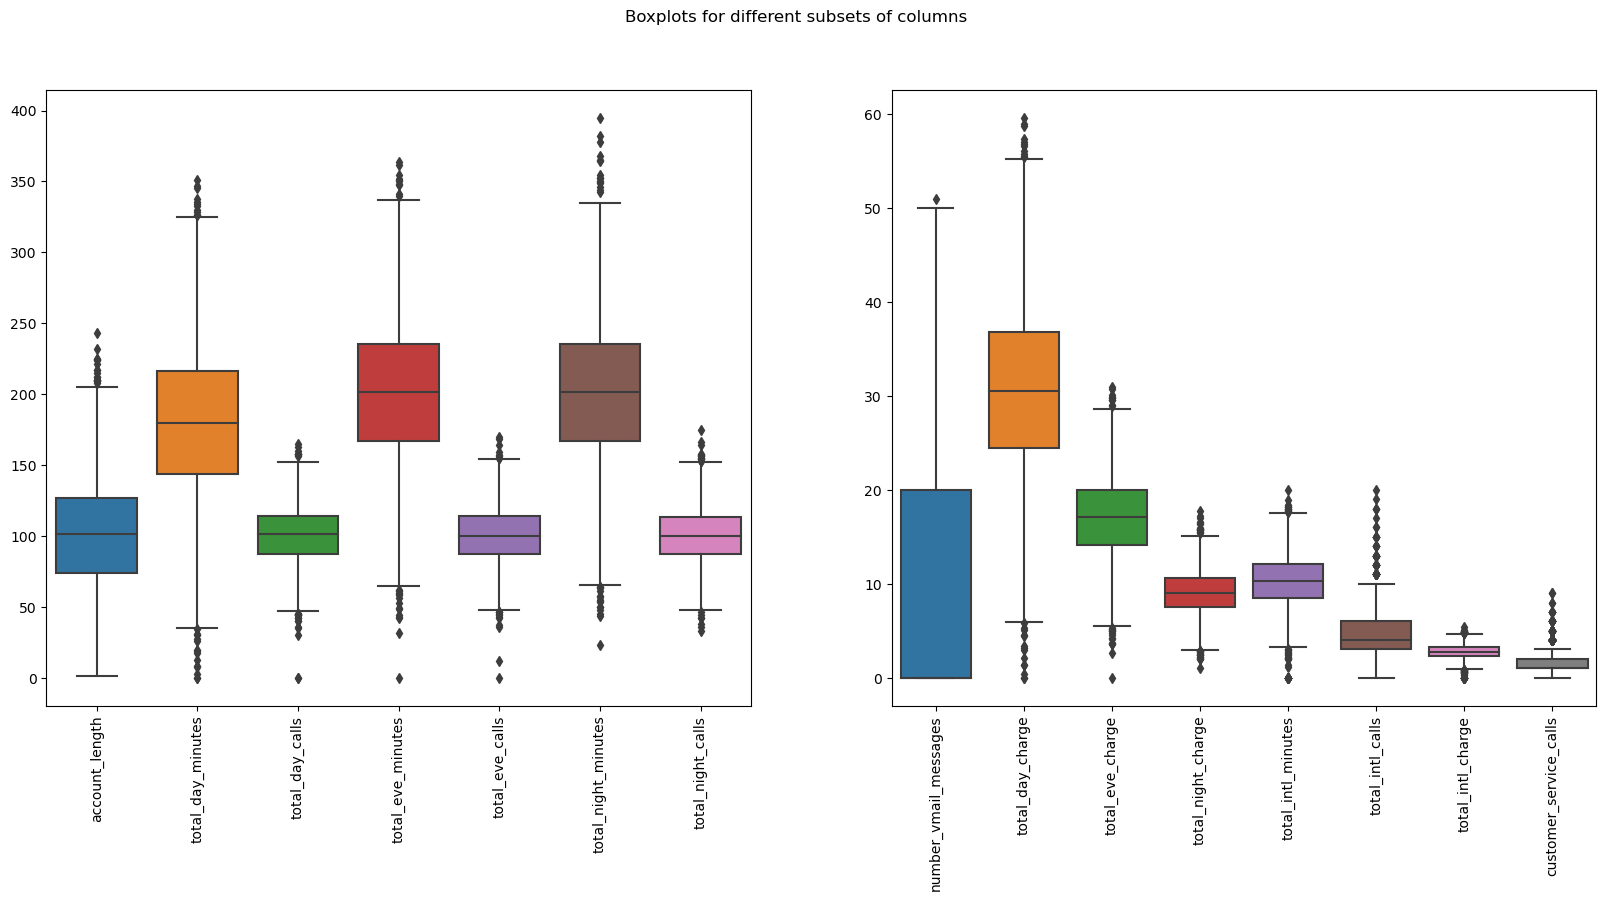

In [27]:
#Checking for outliers in the data
# List of columns for the first boxplot
cols1 = ['account_length','total_day_minutes','total_day_calls',
                'total_eve_minutes','total_eve_calls','total_night_minutes','total_night_calls']

# List of columns for the second boxplot
cols2 = ['number_vmail_messages', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']

# Create a figure with one row and two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Create a boxplot for the first subset of columns in the first column
sns.boxplot(data=df[cols1], ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Create a boxplot for the second subset of columns in the second column
sns.boxplot(data=df[cols2], ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

#setting the figure title
fig.suptitle('Boxplots for different subsets of columns')

# Show the plot
plt.show()

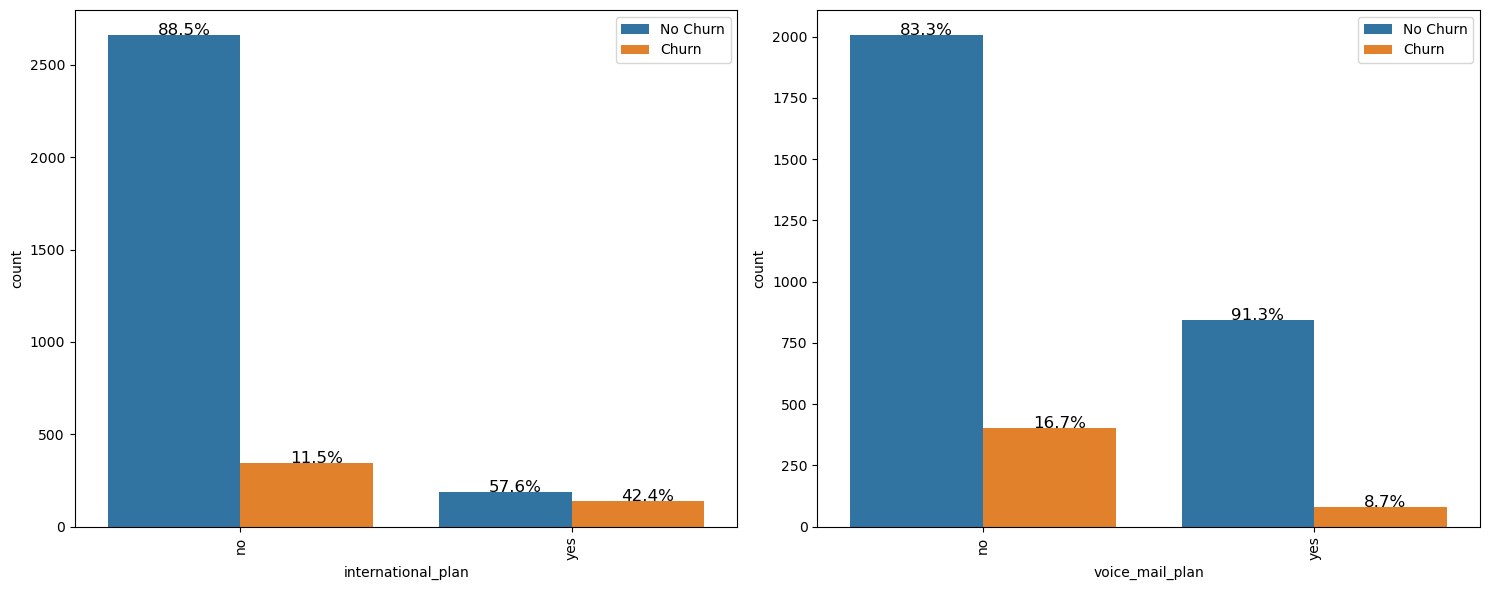

In [28]:
categoric_cols = ['international_plan','voice_mail_plan']

fig, axes = plt.subplots(nrows=1, ncols=len(categoric_cols), figsize=(15, 6))

for i, col in enumerate(categoric_cols):
    ax = sns.countplot(x=col, hue="churn", data=df, order=df[col].value_counts().iloc[0:15].index, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(handles, ['No Churn', 'Churn'], loc="upper right")

    # Calculate the total number of observations within each group
    totals = df.groupby(col)["churn"].count().values

    # Iterate over the rectangles in the plot
    for j, p in enumerate(ax.patches):
        # Calculate the percentage of observations in each group
        percentage = '{:.1f}%'.format(100 * p.get_height()/totals[j % 2])
        # Add text annotations with the calculated percentages
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12)

plt.tight_layout()
plt.show()

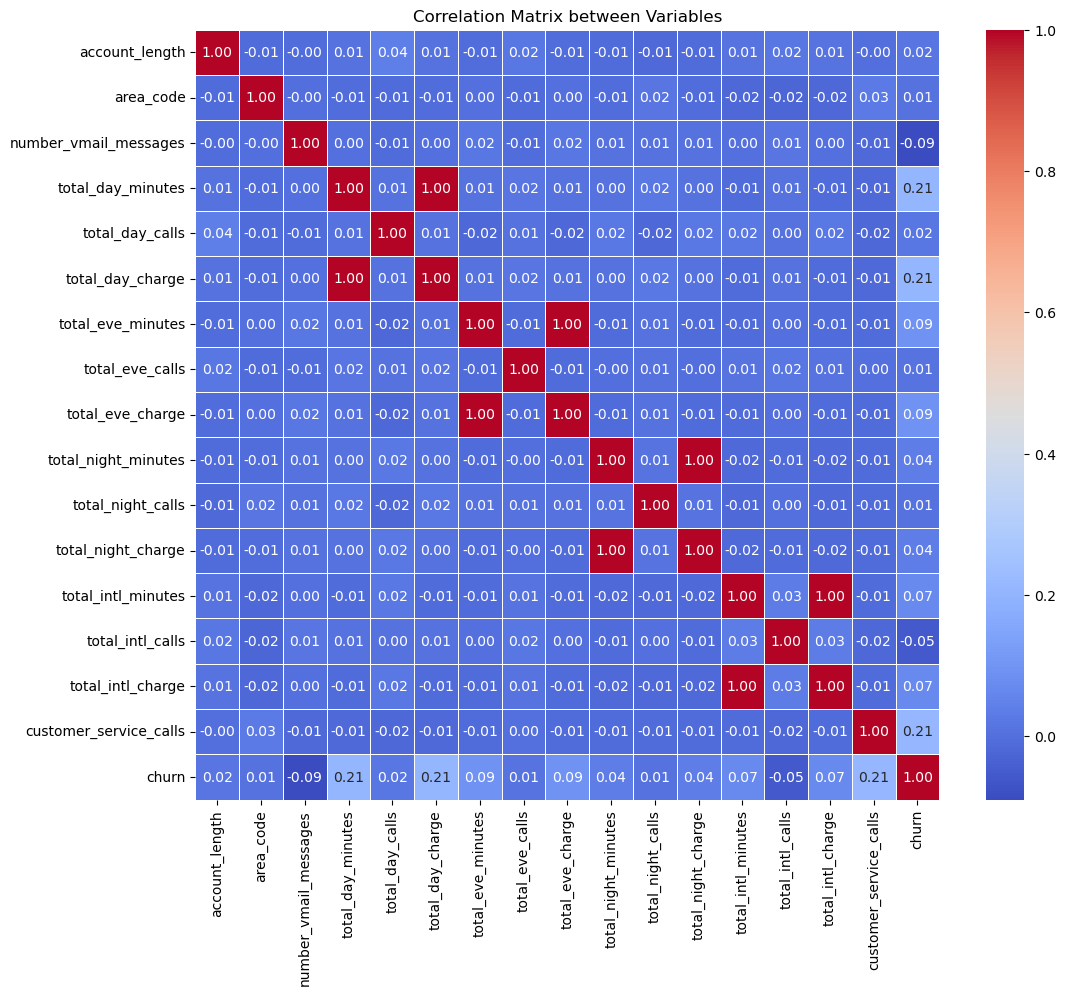

In [29]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Variables')
plt.show();

In [30]:
#convert churn values to integer 1s and 0s
df['churn'] = df['churn'].astype(int)

#convert area_code, international plan, and voice_mail_plan to integers 1s and 0s
df = pd.get_dummies(df, columns=['area_code', 'international_plan', 'voice_mail_plan'])


In [31]:
#displace the first 10 records
df.head(7)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_charge,customer_service_calls,churn,area_code_408,area_code_415,area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
phone_number,,,,,,,,,,,,,,,,,,,,,
382-4657,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,2.70,1,0,0,1,0,1,0,0,1
371-7191,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,3.70,1,0,0,1,0,1,0,0,1
358-1921,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,3.29,0,0,0,1,0,1,0,1,0
375-9999,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,1.78,2,0,1,0,0,0,1,1,0
330-6626,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,2.73,3,0,0,1,0,0,1,1,0
391-8027,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,...,1.70,0,0,0,0,1,0,1,1,0
355-9993,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,...,2.03,3,0,0,0,1,1,0,0,1


In [32]:
# Separating features from the target variable
y = df['churn']
X = df.drop('churn', axis=1)

bruh

In [33]:

df1=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df1['pairs'] = list(zip(df1.level_0, df1.level_1))

# set index to pairs
df1.set_index(['pairs'], inplace = True)

#d rop level columns
df1.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df1.columns = ['cc']

# drop duplicates. This could be dangerous i
df1[(df1.cc>.75) & (df1.cc <1)]

,cc
pairs,
"(total_day_minutes, total_day_charge)",1.000000
"(total_day_charge, total_day_minutes)",1.000000
"(total_eve_charge, total_eve_minutes)",1.000000
"(total_eve_minutes, total_eve_charge)",1.000000
"(total_night_minutes, total_night_charge)",0.999999
"(total_night_charge, total_night_minutes)",0.999999
"(total_intl_charge, total_intl_minutes)",0.999993
"(total_intl_minutes, total_intl_charge)",0.999993
"(number_vmail_messages, voice_mail_plan_no)",0.956927


## Feature Engineering 

Feature engineering is the process of 

## Label Encoding 

Label Encoding

## One-Hot Encoding 

One Hot-Encoding is 

In [34]:
scaler = MinMaxScaler()

# Define function for scaling a column
def scaling(column):
    return scaler.fit_transform(df[[column]])

# Iterate through numerical columns and scale them
for column in df.select_dtypes(include=[np.number]).columns:
    df[[column]] = scaling(column)

df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_charge,customer_service_calls,churn,area_code_408,area_code_415,area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
phone_number,,,,,,,,,,,,,,,,,,,,,
382-4657,0.524793,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,...,0.500000,0.111111,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
371-7191,0.438017,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,...,0.685185,0.111111,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
358-1921,0.561983,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,...,0.609259,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
375-9999,0.342975,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,...,0.329630,0.222222,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
330-6626,0.305785,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,...,0.505556,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


# Data Modelling 

- Logistic Regression 
- Decision Tree
- Random Forest 
- XG Boost

In [35]:
#Defining X and y
X = df.drop("churn", axis=1)
y = df["churn"]

In [36]:

# Perform a split in the data into Training set and test sets 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=123)

SMOTE 

In [37]:
#instantiate SMOTENC
from imblearn.over_sampling import SMOTE, SMOTENC

smote = SMOTENC(categorical_features = [1,2],random_state = 123)
resampled_X_train, resampled_y_train = smote.fit_resample(X_train,y_train)

standardizing the data and solving class imbalance problems

In [38]:
y=df['churn']
X= df.drop('churn', axis=1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=20)

# standardizing the data
scaler= MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

# Set the random seed
random_seed = 42
np.random.seed(random_seed)
# smote
smote= SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
 
y_train_resampled.value_counts()

0.0    1992
1.0    1992
Name: churn, dtype: int64

# Logistic regression

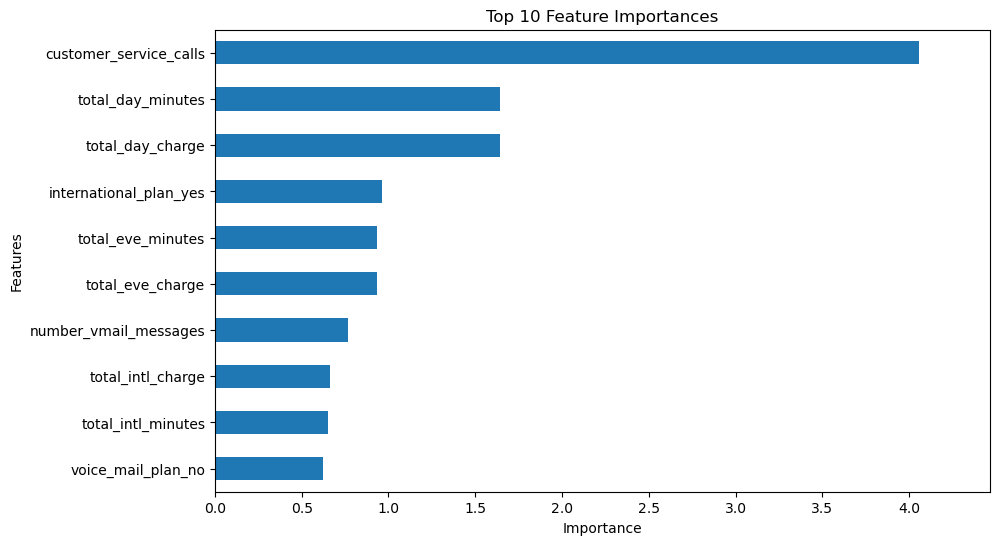

In [39]:
from sklearn.linear_model import LogisticRegression

# Assuming X_train and y_train are your training data and labels
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Now you can access the coefficients
importance = logreg.coef_[0]

# Feature Importances
importance = logreg.coef_[0]
feature_names = resampled_X_train.columns
feature_importances = pd.Series(importance,index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_features = feature_importances[:10]  # Select the top 10 features
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.xlim(0, max(top_features)* 1.1)  # Set the xlim to the maximum importance value
plt.show()

In [40]:
# Performing Logistic Regression

# Train-Test Split
X = df.drop('churn', axis=1)  # Features
y = df['churn']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

CR = classification_report(y_test, y_pred)
print("Classification Report (Test Data):\n", CR)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test Data):\n", conf_matrix)

Accuracy: 0.8515742128935532
Classification Report (Test Data):
               precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       566
         1.0       0.54      0.15      0.23       101

    accuracy                           0.85       667
   macro avg       0.70      0.56      0.58       667
weighted avg       0.82      0.85      0.81       667

Confusion Matrix (Test Data):
 [[553  13]
 [ 86  15]]


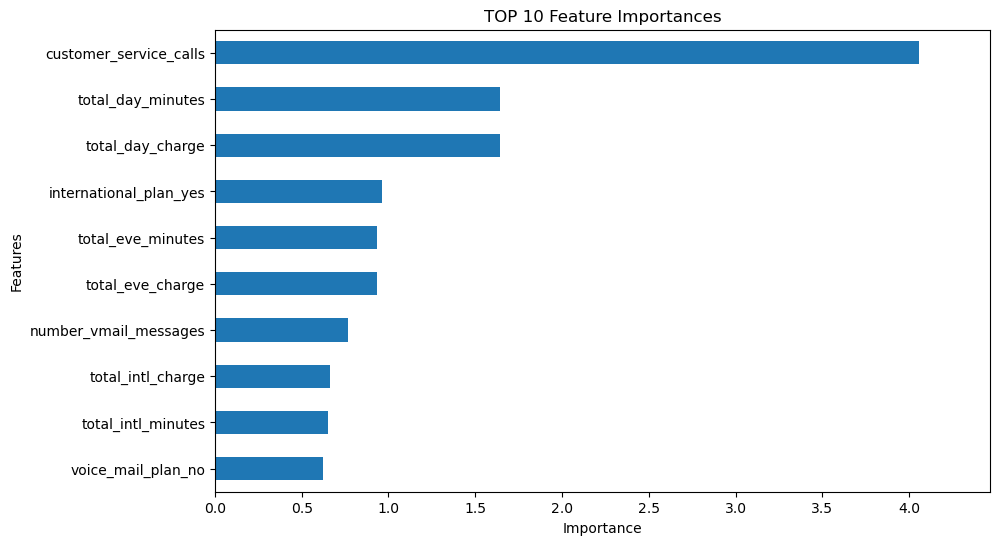

In [41]:
#Feature Importance in the logistics Regression

importance_logreg = logreg.coef_[0]
Feature_names = resampled_X_train.columns
Feature_importances = pd.Series(importance_logreg,index=Feature_names)
Feature_importances = Feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
top_features = Feature_importances[:10] #selecting the top 10
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('TOP 10 Feature Importances')
plt.xlim(0, max(top_features)*1.1) #setting nthe xlim to the max importance value
plt.show()
